In [1]:
!pip install torch-geometric
from numpy import loadtxt
import numpy as np
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch.optim import Adam
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
import numpy as np
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.4 MB/s eta 0:00:00


In [2]:
#installing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
positions = np.load('/content/drive/MyDrive/My_stratego_project/files/X_new_positions_encoded.csv.npy') #load datasets
winners = pd.read_csv("/content/drive/MyDrive/My_stratego_project/files/Y_winners_encoded.csv", header = None)
positions = positions.reshape(52312, 40, 12)

In [15]:
for i in range(len(positions)):
       positions[i] = torch.tensor(positions[i])
type(positions[0])

numpy.ndarray

In [5]:
new_positions = np.array([])


new_positions = np.array([])

for i in range(len(positions)):
    if len(new_positions) == 0:
        new_positions = positions[i].reshape(1, -1, 12)
    else:
        new_positions = np.concatenate((new_positions, positions[i].reshape(1, -1, 12)), axis=0)

print(new_positions.shape)#alternates the postitions numpy array to fit Geometric dataset


(52312, 40, 12)


In [7]:
arr_reshaped = new_positions.reshape(new_positions.shape[0], -1)

In [13]:
#Creates a new array changing the shape from (4,10,12) to (40,12) = (nodes,features)
#takes a looong time need to save to csv



In [24]:
torch.transpose(new_positions[0], 0,1).shape

IndexError: index 0 is out of bounds for axis 0 with size 0

In [25]:
len(new_positions[0].view(-1))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [26]:
torch.tensor(winners[0])[0]

tensor(0., dtype=torch.float64)

In [35]:
gam.shape

(40, 12)

In [93]:
edge_index = []
num_rows = 4
num_cols = 10
for row in range(num_rows):
    for col in range(num_cols):
        node_idx = row * num_cols + col

        if row > 0:  # Connect to top neighbor
            top_neighbor_idx = (row - 1) * num_cols + col
            edge_index.append([node_idx, top_neighbor_idx])

        if row < num_rows - 1:  # Connect to bottom neighbor
            bottom_neighbor_idx = (row + 1) * num_cols + col
            edge_index.append([node_idx, bottom_neighbor_idx])

        if col > 0:  # Connect to left neighbor
            left_neighbor_idx = row * num_cols + (col - 1)
            edge_index.append([node_idx, left_neighbor_idx])

        if col < num_cols - 1:  # Connect to right neighbor
            right_neighbor_idx = row * num_cols + (col + 1)
            edge_index.append([node_idx, right_neighbor_idx])

edge_index = torch.tensor(edge_index, dtype=torch.long).t()

In [193]:
positions.shape

(52312, 40, 12)

In [194]:
matches_dataset = list()
i=-1
for game in positions:
  i+=1
  matches_dataset.append(Data(x=torch.tensor(game), edge_index=edge_index, y=torch.tensor(winners[0][i])))

matches_loader_12_features = DataLoader(matches_dataset, batch_size=100, shuffle=False)

In [195]:
matches_dataset = list()
i=-1
for game in positions:
  i+=1
  matches_dataset.append(Data(x=torch.tensor(np.argmax(game, axis=1)).reshape(40,1), edge_index=edge_index, y=torch.tensor(winners[0][i])))

matches_loader_1dummy = DataLoader(matches_dataset, batch_size=100, shuffle=False)

In [198]:
len(matches_loader_12_features.dataset)

52312

In [28]:
len(matches_loader_12_features.dataset)

52312

In [ ]:
one_hot_features = np.argmax(positions[0], axis=1).reshape(4, 10, order='F')


In [17]:
adj_matrix = np.zeros((40, 40))
for i in range(4):
    for j in range(10):
        index = i * 10 + j  #Node index
        if i > 0:
            adj_matrix[index, (i-1) * 10 + j] = 1  #Connected to top neighbor
        if i < 3:
            adj_matrix[index, (i+1) * 10 + j] = 1  #Connected to bottom neighbor
        if j > 0:
            adj_matrix[index, i * 10 + (j-1)] = 1  #Connected to left neighbor
        if j < 9:
            adj_matrix[index, i * 10 + (j+1)] = 1  #Connected to right neighbor


adj_tensor = torch.FloatTensor(adj_matrix)
data_tensor = torch.FloatTensor(np.array(positions))


In [29]:
edge_index

tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  6,
          6,  6,  7,  7,  7,  8,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16,
         16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21,
         21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26,
         26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 30, 30, 31, 31,
         31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37,
         37, 38, 38, 38, 39, 39],
        [10,  1, 11,  0,  2, 12,  1,  3, 13,  2,  4, 14,  3,  5, 15,  4,  6, 16,
          5,  7, 17,  6,  8, 18,  7,  9, 19,  8,  0, 20, 11,  1, 21, 10, 12,  2,
         22, 11, 13,  3, 23, 12, 14,  4, 24, 13, 15,  5, 25, 14, 16,  6, 26, 15,
         17,  7, 27, 16, 18,  8, 28, 17, 19,  9, 29, 18, 10, 30, 21, 11, 31, 20,
         22, 12, 32, 21, 23, 13, 33, 22, 24, 14, 34, 23, 25, 15, 35, 24, 26

In [ ]:

active_indices = np.argmax(positions[0], axis=2)
active_indices = torch.tensor(active_indices)

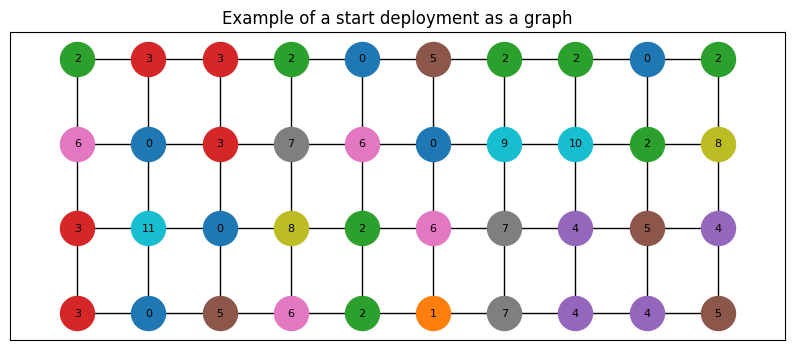

<Figure size 640x480 with 0 Axes>

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Generate a 4x10 grid graph
G = nx.grid_2d_graph(4, 10)

# Create a figure and axis for the plot
plt.figure(figsize=(10, 4))
ax = plt.gca()

# Generate node positions for a 4x10 grid
pos = {(x, y): (y, -x) for x in range(4) for y in range(10)}

one_hot_features = np.argmax(positions[0], axis=1).reshape(4, 10, order='F')

# Iterate over the nodes and assign labels and colors
for (x, y) in G.nodes():
    # Find the index of the active feature
    active_feature_index = one_hot_features[x, y]

    # Assign label and color based on the active feature index
    label = str(active_feature_index)
    color = plt.cm.tab10(active_feature_index)  # Use a color map for coloring nodes

    # Draw the node with the assigned label and color
    nx.draw_networkx_nodes(G, pos=pos, nodelist=[(x, y)], node_color=[color], node_size=600, ax=ax)
    nx.draw_networkx_labels(G, pos=pos, labels={(x, y): label}, font_color='black', font_size=8, ax=ax)

# Draw the edges of the graph
nx.draw_networkx_edges(G, pos=pos, ax=ax)

# Set plot title
plt.title('Example of a start deployment as a graph')

# Show the plot
plt.show()
plt.savefig('grid_graph.png')

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        return x

adjacency_matrix = adj_tensor
#define one-hot encoded node features

active_indices = torch.tensor(np.argmax(positions[0], axis=2))
node_features = torch.tensor(np.eye(12)[active_indices.flatten()].reshape(40, 12))


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(12, 64, 2)

criterion = torch.nn.BCELoss()#Binary cross entropy loss

optimizer = Adam(model.parameters(), lr=0.01)#Adam Optimizer



AxisError: axis 2 is out of bounds for array of dimension 2

In [96]:
edge_index,data.edge_index

(tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  6,
           6,  6,  7,  7,  7,  8,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 11, 12,
          12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16,
          16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21,
          21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26,
          26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 30, 30, 31, 31,
          31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37,
          37, 38, 38, 38, 39, 39],
         [10,  1, 11,  0,  2, 12,  1,  3, 13,  2,  4, 14,  3,  5, 15,  4,  6, 16,
           5,  7, 17,  6,  8, 18,  7,  9, 19,  8,  0, 20, 11,  1, 21, 10, 12,  2,
          22, 11, 13,  3, 23, 12, 14,  4, 24, 13, 15,  5, 25, 14, 16,  6, 26, 15,
          17,  7, 27, 16, 18,  8, 28, 17, 19,  9, 29, 18, 10, 30, 21, 11, 31, 20,
          22, 12, 32, 21, 23, 13, 33, 22, 24, 14, 34, 23, 25, 1

In [99]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv, GATv2Conv, TransformerConv, SAGEConv
from torch_geometric.nn import global_mean_pool

class GNN(torch.nn.Module):
    def __init__(self, input_size, hidden_channels, conv, conv_params={}):
        super(GNN, self).__init__()
        torch.manual_seed(12345)

        self.conv1 = conv(
            input_size, hidden_channels, **conv_params)

        self.conv2 = conv(
            hidden_channels, hidden_channels, **conv_params)

        self.lin = Linear(hidden_channels, 2)

    def forward(self, x, edge_index, batch = None,  edge_col = None):

        # Node embedding
        x = self.conv1(x, edge_index, edge_col)
        x = x.relu()
        x = self.conv2(x, edge_index, edge_col)

        # Readout layer
        batch = torch.zeros(data.x.shape[0],dtype=int) if batch is None else batch
        x = global_mean_pool(x, batch)

        self.weight = self.weight.to(x.dtype)
        self.bias = self.bias.to(x.dtype)

        # Final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

In [139]:
class SimpleGNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        # attention opperation
        x = self.attention(x, torch.zeros(x.size(0), dtype=torch.long))
        #Mean pooling operation
        x = global_mean_pool(x, torch.zeros(x.size(0), dtype=torch.long))

        return x

In [203]:
only_25_power = (len(matches_loader_12_features.dataset)*0.25)

len(matches_loader_12_features.dataset[:int(only_25_power)])

13078

In [201]:
len(matches_loader_12_features.dataset)

52312

In [ ]:
from torch.nn import BCEWithLogitsLoss
from sklearn.model_selection import train_test_split

# Split dataset into training and validation sets
train_dataset, val_dataset = train_test_split(matches_loader_12_features.dataset[:int(only_25_power)], test_size=0.2, random_state=42)


#define record keeping
epoch_loss = 0

train_losses = []

# 2. Instantiate the Model
input_size = 12  # Assuming each node has 12 features
hidden_channels = 40

conv = SAGEConv  # Choose the desired graph convolutional layer
conv_params = {}  # Additional parameters for the convolutional layer
model = SimpleGNN(input_size, hidden_channels,1)




# 3. Define Loss Function and Optimizer
criterion = BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr=0.001)
# 4. Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for data in train_dataset:
        optimizer.zero_grad()
        x, edge_index, y = data.x.float(), data.edge_index, data.y  # Extract node features, edge index, and target labels
        # Assume batch assignment is not required, hence batch is None

        output = model(x, edge_index)
        output = output.squeeze(0).squeeze(0)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()  # Accumulate the loss for this batch

    # Calculate average loss for this epoch
    epoch_loss /= len(train_dataset)
    train_losses.append(epoch_loss)


In [153]:
# 5. Evaluation
model.eval()
total_loss = 0
correct = 0
total = 0
with torch.no_grad():
    for data in val_dataset:
        x, edge_index, y = data.x.float(), data.edge_index, data.y  # Extract node features, edge index, and target labels

        # Reshape node features x to (batch_size * num_nodes, num_features)
        #x = x.view(-1, x.size(-1))

        output = model(x, edge_index)
        output = output.squeeze(0).squeeze(0)
        total_loss += criterion(output, y).item()
        predicted = torch.argmax(output)
        correct += (predicted == y).sum().item()
        total += y

# Compute accuracy
accuracy = correct / total
print(f'Validation Accuracy: {accuracy}')

torch.float32
torch.float32
torch.float32
torch.float64


RuntimeError: expected m1 and m2 to have the same dtype, but got: double != float

In [105]:
data.x


tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0

In [183]:
# 5. Evaluation
model.eval()
total_loss = 0
correct = 0
total = 0
with torch.no_grad():
    for data in val_dataset:
        x, edge_index, y = data.x.float(), data.edge_index, data.y  # Extract node features, edge index, and target labels

        # Reshape node features x to (batch_size * num_nodes, num_features)
        #x = x.view(-1, x.size(-1))

        output = model(x, edge_index)
        output = output.squeeze(0).squeeze(0)
        total_loss += criterion(output, y).item()
        predicted = torch.argmax(output)
        correct += (predicted == y).sum().item()
        total += y

# Compute accuracy
accuracy = correct / total
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.9580602883355177


In [179]:
torch.argmax(output, dim=1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [181]:
y

tensor(0., dtype=torch.float64)

In [182]:
(predicted == y).sum().item()

1

In [162]:
output

tensor(-0.4856)

In [98]:
data.edge_index

tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  6,
          6,  6,  7,  7,  7,  8,  8,  8,  9,  9, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16,
         16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21,
         21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26,
         26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 30, 30, 31, 31,
         31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37,
         37, 38, 38, 38, 39, 39],
        [10,  1, 11,  0,  2, 12,  1,  3, 13,  2,  4, 14,  3,  5, 15,  4,  6, 16,
          5,  7, 17,  6,  8, 18,  7,  9, 19,  8,  0, 20, 11,  1, 21, 10, 12,  2,
         22, 11, 13,  3, 23, 12, 14,  4, 24, 13, 15,  5, 25, 14, 16,  6, 26, 15,
         17,  7, 27, 16, 18,  8, 28, 17, 19,  9, 29, 18, 10, 30, 21, 11, 31, 20,
         22, 12, 32, 21, 23, 13, 33, 22, 24, 14, 34, 23, 25, 15, 35, 24, 26

In [83]:
type(x)

list

In [84]:
for data in train_loader:
  print(data)

DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 540672], y=[64], batch=[2560], ptr=[65])
DataBatch(x=[64], edge_index=[2, 54067

KeyboardInterrupt: 

In [60]:
train_loader.batch_size

64

In [34]:
damodel = GNN()

TypeError: GNN.__init__() missing 3 required positional arguments: 'input_size', 'hidden_channels', and 'conv'

In [ ]:
X_train = positions[0:39234] #75% is train
X_test = positions[39234:52312]
y = winners[0].values


# define the keras model
model = Sequential()
model.add(Dense(40, input_shape=(40,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
winners

In [ ]:
data.x.shape

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import DataLoader
from torch.utils.data import random_split
# Define your GCN model
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(x)

        # Apply binary classification
        x = torch.sigmoid(x)
        return x

# Define hyperparameters
input_dim = 480  # Dimension of input features
hidden_dim = 64  # Dimension of hidden layer
output_dim = 12  # Dimension of output (number of classes)

# Create your GCN model
model = GCN(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Split dataset into training and validation sets
dataset = matches_dataset  # Initialize your dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader objects for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for epoch in range(5):
    model.train()
    for data in matches_dataset:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            data = data.to(device)
            output = model(data)
            _, predicted = torch.max(output, 1)
            total += data.y.size(0)
            correct += (predicted == data.y).sum().item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Validation Accuracy: {100 * correct / total}%')

# Evaluate your model on test set if available


In [ ]:
data.x
x = torch.mean(data.x, dim=0)

In [ ]:
import torch
import torch.nn as nn

class RNNClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward pass through RNN
        out, _ = self.rnn(x, h0)

        # Extract the output of the last time step
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        # Sigmoid activation for binary classification
        out = self.sigmoid(out)

        return out


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split


def custom_collate(batch):
    # Extract features (x) and labels (y) from the Data objects in the batch
    xs = [data.x for data in batch]
    ys = [data.y for data in batch]

    # Stack the features and labels into tensors
    x_batch = torch.stack(xs)
    y_batch = torch.stack(ys)

    return x_batch, y_batch


# Define hyperparameters
input_size = 480  # Number of features for each node
hidden_size = 64  # Hidden size of the RNN
num_layers = 1  # Number of RNN layers
output_size = 1  # Output size (binary classification)

# Instantiate the RNNClassifier model
model = RNNClassifier(input_size, hidden_size, num_layers, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Assuming you have already split your dataset into train and test sets
#test_dataset = MatchesDataset(test_data)    # Create MatchesDataset instance with your test data

# Create DataLoader objects for batching and shuffling your dataset
val = int(len(matches_dataset) * 0.8)  # Convert val to an integer
train_dataset, val_dataset = matches_dataset[:val], matches_dataset[val:]

train_loader = DataLoader(train_dataset, batch_size=64, collate_fn=custom_collate,shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=64, collate_fn=custom_collate,shuffle=False)

# Training loop
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    batch_num = -1
    for batch in train_loader:
        batch_num +=1
        inputs, labels = batch[0], batch[1]  # Extract input features and labels from batch
        inputs = inputs.unsqueeze(0).float()
        inputs = inputs.permute(1, 0, 2)  # Convert inputs to float tensor if needed
        labels = labels.float()  # Convert labels to float tensor if needed

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs.squeeze(), labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track the running loss
        running_loss += loss.item() * inputs.size(0)

    # Print average loss for the epoch
    epoch_loss = running_loss / len(matches_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
list_output = []

# Validation loop (optional)
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    batchnum = -1
    for batch in test_loader:
        batchnum += 1
        inputs, labels = batch[0] , batch[1]  # Extract input features and labels from batch
        inputs = inputs.unsqueeze(0).float()
        print(inputs.shape)
        inputs = inputs.permute(1, 0, 2)  # Convert inputs to float tensor if needed
        labels = labels.float()  # Convert labels to float tensor if needed

        # Forward pass
        outputs = model(inputs)
        list_output.append(outputs)

        # Convert outputs to binary predictions (0 or 1)
        predictions = list_output[batchnum]




In [ ]:
for batch in DataLoader(train_dataset, batch_size=64, collate_fn=custom_collate,shuffle=False):
   print(len(batch[0]))

In [ ]:
batch

In [ ]:
list_output[0]-labels

In [ ]:
labels

In [ ]:
inputs.shape

In [ ]:
batch[0].shape

In [ ]:
 batch[0][0].view(-1)

In [ ]:
batch[1]

In [ ]:
len(train_loader)*64